# Cheap Models

In [31]:
# Copied and pasted from my imports from project 3, 
# delete if we dont need(Aerika)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

import regex as re

from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,ave_agi
0,0,いざかや-おせん-izakaya-osen-los-angeles,"['sushi', 'izakaya', 'seafood']",Los Angeles,us0WnDOySVXXXwCqs0AaCw,34.083192,-118.273245,2,4.5,651.0,90026.0,44.191297
1,1,yummy-crepe-stand-los-angeles,"['streetvendors', 'creperies']",Los Angeles,xFMzCotq4cURN37cvTr9eQ,34.078743,-118.263756,1,4.5,3.0,90026.0,44.191297
2,2,yum-yum-shave-ice-los-angeles-2,"['shavedice', 'foodstands']",Los Angeles,Tub-psQGYAjbtny6MnfQmg,34.077049,-118.258873,1,5.0,2.0,90026.0,44.191297
3,3,yoga-urt-los-angeles,"['icecream', 'juicebars', 'vegan']",Los Angeles,vsRKNraKeeddoOXL2btQ5A,34.077688,-118.265555,1,4.5,46.0,90026.0,44.191297
4,4,yami-yaki-los-angeles-2,['teppanyaki'],Los Angeles,Bcp6NEv7CGTOtnIgvo6Unw,34.077917,-118.263523,1,4.5,74.0,90026.0,44.191297


In [3]:
df.shape

(9657, 12)

In [4]:
df = df.drop(columns='Unnamed: 0')

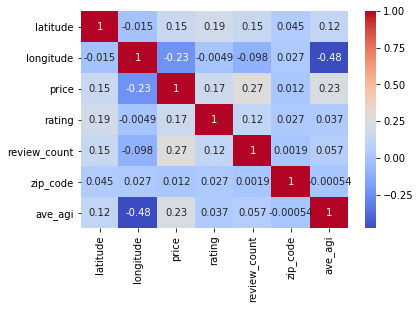

In [5]:
sns.heatmap(df.corr(),
           annot = True,
           cmap = 'coolwarm')

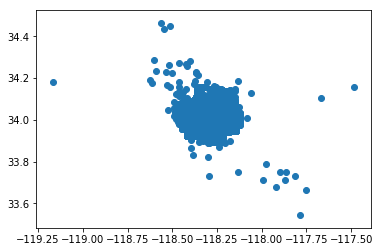

In [6]:
plt.scatter(df['longitude'], df['latitude'])

# KMeans Clustering

In [7]:
df._get_numeric_data()

,latitude,longitude,price,rating,review_count,zip_code,ave_agi
0,34.083192,-118.273245,2,4.5,651.0,90026.0,44.191297
1,34.078743,-118.263756,1,4.5,3.0,90026.0,44.191297
2,34.077049,-118.258873,1,5.0,2.0,90026.0,44.191297
3,34.077688,-118.265555,1,4.5,46.0,90026.0,44.191297
4,34.077917,-118.263523,1,4.5,74.0,90026.0,44.191297
...,...,...,...,...,...,...,...
9652,33.990845,-118.460079,3,5.0,6.0,90290.0,153.772000
9653,33.822453,-118.301476,3,5.0,3.0,90501.0,56.521919
9654,33.893440,-118.352870,1,5.0,20.0,90260.0,39.781789
9655,34.127140,-118.059020,2,5.0,30.0,91007.0,82.902334


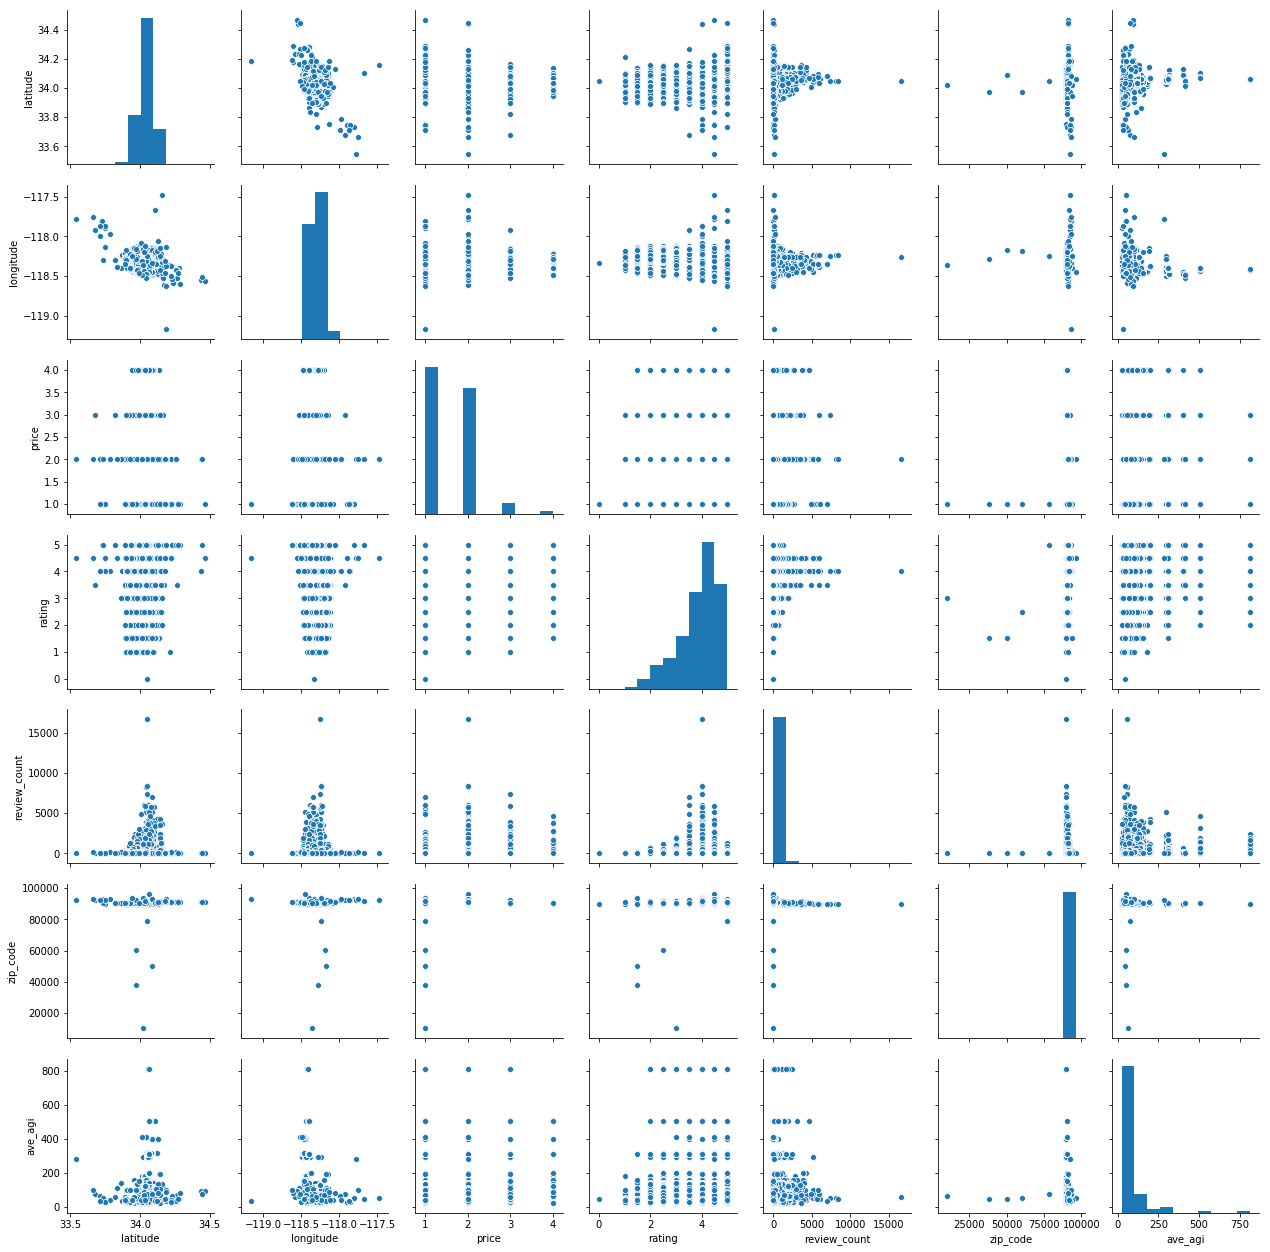

In [8]:
# Try to pick interesting columns for clustering

sns.pairplot(df._get_numeric_data())

In [9]:
# Function to create KMeans Clustering for 2 features from original dataframe

def kmean(var1, var2):
    features = [var1, var2]
    X = df[features]

    sc = StandardScaler()
    X = sc.fit_transform(X)

    km = KMeans(n_clusters=3,
           random_state=42)
    km.fit(X)

    df_copy = df.copy()
    df_copy['cluster'] = km.labels_

    print(f' Cluster Centers: \n{km.cluster_centers_}')

    centroids = pd.DataFrame(
        sc.inverse_transform(km.cluster_centers_),
        columns = features
    )

    print(f' Centroids for Plot: \n{centroids}')


    # Visualizing Clusters
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["red", "green", "blue"]
    df_copy['color'] = df_copy['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=var1, y=var2,
        figsize=(10,8),
        c = df_copy['color']
    )

    centroids.plot(
        kind="scatter", 
        x=var1, y=var2, 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    );

 Cluster Centers: 
[[ 0.6930101   0.21276687]
 [-0.97132822  1.00520429]
 [-0.48290943 -1.17934738]]
 Centroids for Plot: 
    latitude   longitude
0  34.080441 -118.289504
1  33.988566 -118.221115
2  34.015528 -118.409646


<Figure size 504x504 with 0 Axes>

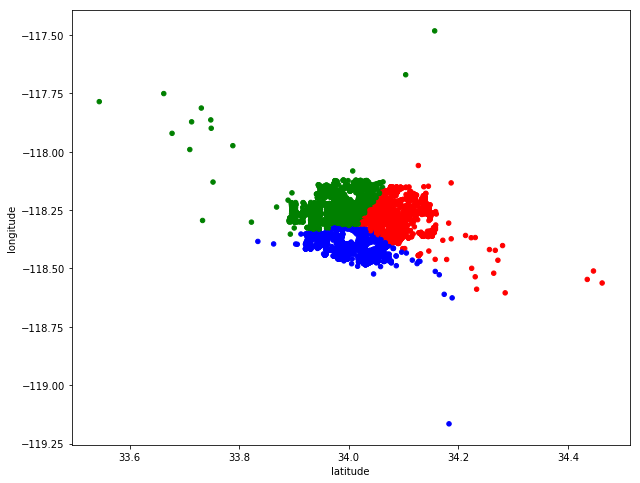

In [10]:
kmean('latitude', 'longitude')

 Cluster Centers: 
[[ 7.32506128e-01  2.00400293e-02]
 [-9.29913267e-01  1.58344169e-02]
 [ 6.78218419e-01 -4.38878805e+01]]
 Centroids for Plot: 
    longitude      zip_code
0 -118.244650  90147.177844
1 -118.388119  90142.352996
2 -118.249335  39774.250000


<Figure size 504x504 with 0 Axes>

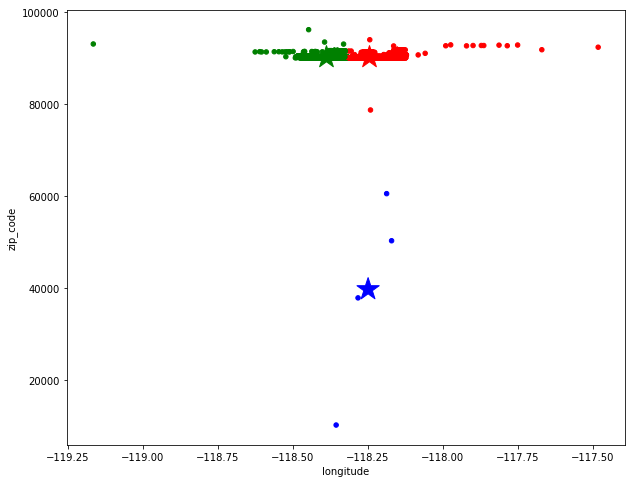

In [11]:
kmean('longitude', 'zip_code')

 Cluster Centers: 
[[-1.23205560e+00  3.53991388e-02]
 [ 5.04453558e-01  1.11427352e-02]
 [-5.13752511e-01 -4.38878805e+01]]
 Centroids for Plot: 
    latitude      zip_code
0  33.974173  90164.798430
1  34.070033  90136.970511
2  34.013825  39774.250000


<Figure size 504x504 with 0 Axes>

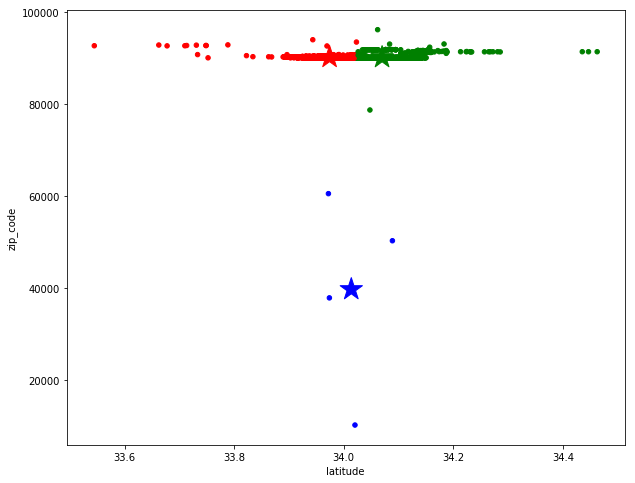

In [12]:
kmean('latitude', 'zip_code')

# Linear Regression Model
- This was really really really bad - Aerika

In [21]:
df_dummied_city = pd.get_dummies(data=df,columns=['city'])

In [51]:
df_dummied_city.head(2)

,alias,category,id,latitude,longitude,price,rating,review_count,zip_code,ave_agi,...,city_W. Los Angeles,city_Walnut Park,city_Watts,city_West Hills,city_West Hollywood,city_West Los Angeles,city_Westchester,city_Westwood,city_Woodland Hills,city_los angeles
0,いざかや-おせん-izakaya-osen-los-angeles,"['sushi', 'izakaya', 'seafood']",us0WnDOySVXXXwCqs0AaCw,34.083192,-118.273245,2,4.5,651.0,90026.0,44.191297,...,0,0,0,0,0,0,0,0,0,0
1,yummy-crepe-stand-los-angeles,"['streetvendors', 'creperies']",xFMzCotq4cURN37cvTr9eQ,34.078743,-118.263756,1,4.5,3.0,90026.0,44.191297,...,0,0,0,0,0,0,0,0,0,0


In [45]:
features = df_dummied_city._get_numeric_data().drop(columns=['ave_agi'])

X = features
y = df_dummied_city['ave_agi']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lr.score(X_train, y_train)

0.5130387957719806

In [49]:
lr.score(X_test, y_test)

-1.016219577368101e+22

In [50]:
cross_val_score(lr, X_train, y_train, cv = 5).mean()

-3.9872565622515054e+27

Jerry's code from previous project, trying to use it to perform a bunch of different models for this project  
Still need to tweak functions so they can be used for this project.

In [11]:
# Not sure if this is how we should be splitting this

X = master_df.drop('zip_code', axis = 1)
y = master_df['zip_code']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

NameError: name 'master_df' is not defined

In [ ]:
def get_continuous(df):
    to_keep = ['age', 
               'fnlwgt', 
               'education-num', 
               'capital-gain', 
               'capital-loss',
               'hours-per-week',
               'agesq',
               'hrssq',
               'fnlwgtsq',
               'edusq',
               'gainsq',
               'lossq'
              ]
    return df[to_keep]

GetContinuous = FunctionTransformer(get_continuous, validate=False)

In [ ]:
for estimator in estimators:
    pipe = Pipeline([
        ('union', FeatureUnion([
            ('continuous', Pipeline([
                ('get_continuous', GetContinuous),
                ('sc', StandardScaler())
            ])),
            ('categorical', GetCategorical)
        ])),
        (estimator, eval(f"est_dict['{estimator}']"))
    ])

In [ ]:
est_dict = {
    'logreg': LogisticRegression(solver='lbfgs'),
    'knn': KNeighborsClassifier(),
    'rand': RandomForestClassifier(n_estimators=100, random_state=111),
    'extra': ExtraTreesClassifier(n_estimators=100, random_state=111),
    'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=111)
}

estimators = ['logreg', 'knn', 'rand', 'extra', 'ada']